In [1]:
cd

C:\Users\56961


In [2]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [3]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_19316\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [4]:

# cargar librerias

# definir librerias
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
import csv

import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import io

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')


C:\Users\56961\AppData\Local\Temp\ipykernel_19316\379782166.py:30: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [5]:
name_df= "data frame/data_frame_sin_falsos"

file = open(name_df, 'rb')
df_experimentacion= pickle.load(file)
file.close()
df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("PIMPLE", "PIMLE")
df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("EMV", "MLE")
print(df_experimentacion.shape)
df_experimentacion.head(2)

(3840000, 12)


,Id_grafo,Tipo_grafo,Metodo_infeccion,Porc_infectados,Tipo_sample_p_gral,Porc_nodos_muestra,Num_metodo_est,Valor_Estimado,Valor_error(Exac - Est),Valor_error_rel(Exac - Est),Densidad,Parametro
0,0,escala,1,0.01,5,0.01,PIMLE,66.883480,-6.883480,-0.114725,10%,676
1,0,escala,1,0.01,5,0.01,MLE,67.176549,-7.176549,-0.119609,10%,676


In [17]:
# input: df_contexto
# inicio funcion 
def graficar_sample_vs_ER(df_contexto,Tipo_sample_p_gral,dict_met_to_ylim,act_legend):
    # colores de la grafica
    #l_color=[171, 235, 198,130, 224, 170,88, 214, 141 ,46, 204, 113 ,40, 180, 99 ,35, 155, 86,29, 131, 72,24, 106, 59 ]
    l_color=[27, 79, 114 ,40, 116, 166 ,46, 134, 193 ,133, 193, 233,230, 176, 170,217, 136, 128 ,169, 50, 38,100, 30, 22 ]
    vec_color=np.array(l_color)/255
    l_colores=[]
    for j in range(int(len(l_color)/3)):
        l_colores.append(tuple(vec_color[j*3:j*3+3]))
    #rainbow_colors_rgb = [(148/255, 0/255, 211/255),(75/255, 0/255, 130/255), (0/255, 0/255, 255/255),  (0/255, 255/255, 0/255),  (255/255, 255/255, 0/255),(255/255, 127/255, 0/255),(255/255, 0/255, 0/255)]
    #rainbow_colors_rgb = [(148/255, 0/255, 211/255),(75/255, 0/255, 130/255),  (0/255, 0/255, 255/255),  (0/255, 255/255, 0/255),  (255/255, 255/255, 0/255),(255/255, 165/255, 0/255),(255/255, 69/255, 0/255),(255/255, 0/255, 0/255)]
    #l_colores=rainbow_colors_rgb

    # funciones a graficar
    l_graficas=['25%','10%', '1%', '0,1%', '0.075%', '0.050%']
    cant_graficas=len(l_graficas)
    dict_num_grafica_to_densidad={u:v for u,v in zip(range(cant_graficas),l_graficas)}
    l_graficas

    # valores filas
    L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
    cant_filas=len(L_met_est)
    dict_num_row_to_est={u:v for u,v in zip(range(cant_filas),L_met_est)}

    # valores columnas
    cant_colums=len(Tipo_sample_p_gral)
    dict_num_colum_to__type_sample={u:v for u,v in zip(range(cant_colums),Tipo_sample_p_gral)}

    size_figure=(12,15)
    fig, axes = plt.subplots(cant_filas,cant_colums, figsize=size_figure, sharex=False, sharey=False)    


    for num_row in range(cant_filas):     # Tipo_sample_p_gral
        metodo_est=dict_num_row_to_est[num_row]    # num_row
        cond_2=df_contexto["Num_metodo_est"]==metodo_est   # num_row ok
        df_row=df_contexto[cond_2]

        for num_col in range(cant_colums):     # L_met_est
            met_sample=dict_num_colum_to__type_sample[num_col]
            cond_1=df_row["Tipo_sample_p_gral"]==met_sample  # num_col ok
            df_col=df_row[cond_1]
            print(num_row,num_col)

            for grafica_i in range(cant_graficas): # L_prop_sample

                densidad=dict_num_grafica_to_densidad[grafica_i]            
                cond_3=df_col["Densidad"]==densidad  # grafica_i
                df_datos=df_col[cond_3]
                datos_i=list(df_datos["Valor_error_rel(Exac - Est)"])

                label_name=densidad
                color=l_colores[grafica_i]
                sns.kdeplot(datos_i,bw=1, label=label_name, lw=1.5,ax=axes[num_row,num_col], color=color)

                #ylim=dict_met_to_ylim[metodo_est]

                #axes[num_row,num_col].set_ylim(ylim)
                #axes[num_row,num_col].set_xlim([-1, 1])            
                axes[num_row,num_col].grid(True)
                if act_legend:
                    axes[num_row,num_col].legend(loc='upper left',fontsize=10, title ='Dens. grafo:', framealpha=0.3)    
                

            xlabel="Error relativo"
            axes[num_row,num_col].set_xlabel(xlabel,fontsize=10) 
            ylabel="Dens. Err. rel("+str(metodo_est)+")."
            axes[num_row,num_col].set_ylabel(ylabel,fontsize=10)      
            titulo="Err. rel v/s muestra tipo "+str(met_sample)+"."
            axes[num_row,num_col].set_title(titulo,fontsize=10) 
    plt.tight_layout()                            

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3


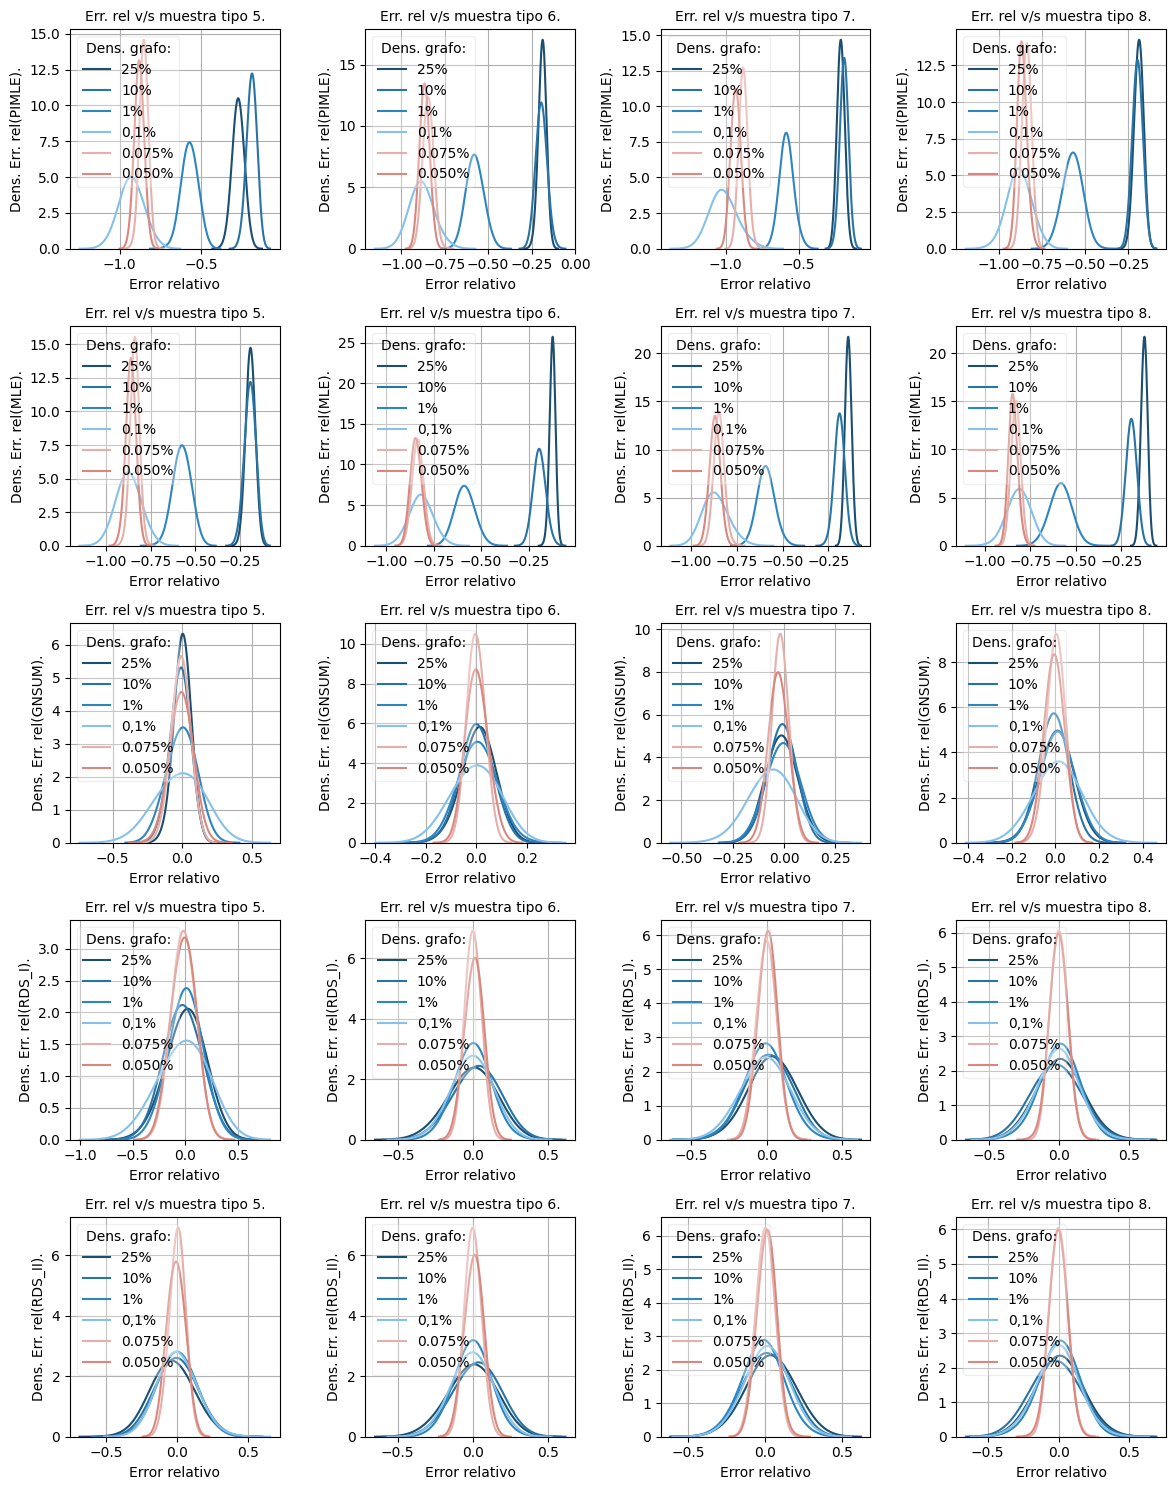

In [21]:
Tipo_sample_p_gral=list(df_experimentacion["Tipo_sample_p_gral"].unique())
#Tipo_sample_p_gral=Tipo_sample_p_gral[0:2]

cond1=df_experimentacion["Porc_nodos_muestra"]==0.1
cond2=df_experimentacion["Metodo_infeccion"]=="DP"
cond3=df_experimentacion["Tipo_grafo"]=="escala"
cond4=df_experimentacion["Porc_infectados"]==0.1
df_contexto=df_experimentacion[cond1 & cond2& cond3& cond4]

l_ylim=[[0,20],[0,20],[0,42],[0,14],[0,15]]
L_met_est=list(df_experimentacion["Num_metodo_est"].unique())
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}

act_legend=True

graficar_sample_vs_ER(df_contexto,Tipo_sample_p_gral,dict_met_to_ylim,act_legend)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3


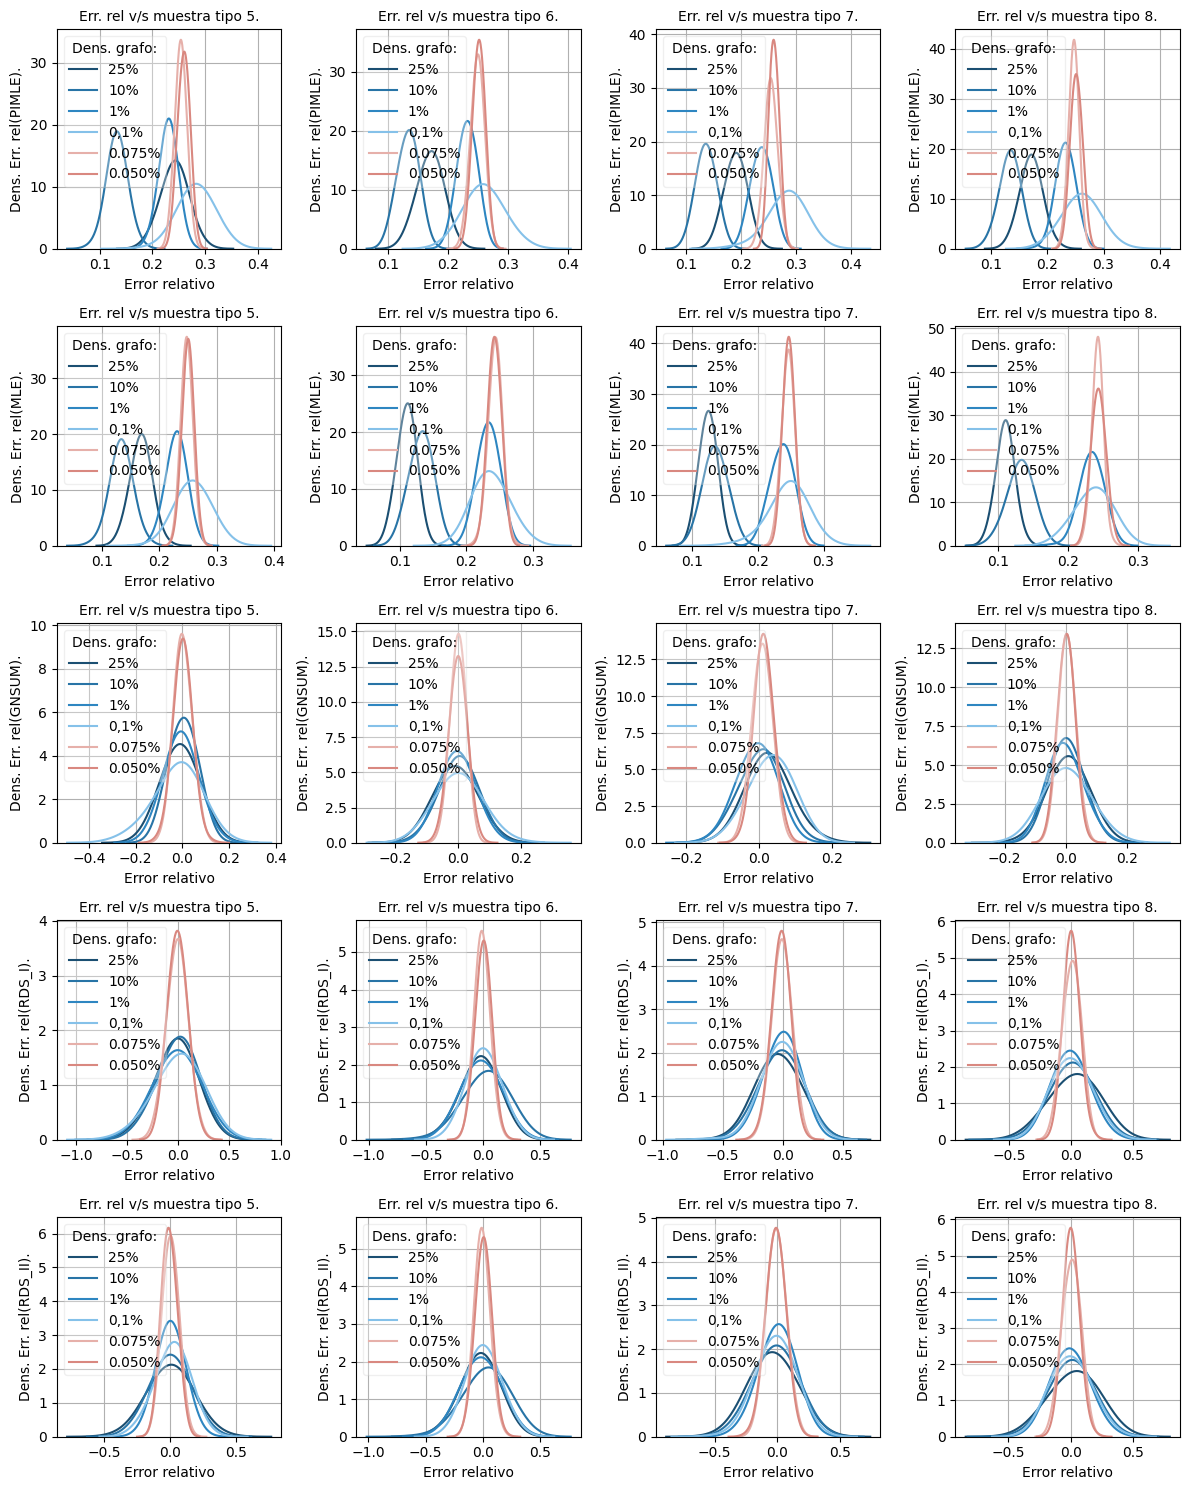

In [22]:
Tipo_sample_p_gral=list(df_experimentacion["Tipo_sample_p_gral"].unique())
#Tipo_sample_p_gral=Tipo_sample_p_gral[0:2]

cond1=df_experimentacion["Porc_nodos_muestra"]==0.1
cond2=df_experimentacion["Metodo_infeccion"]=="IP"
cond3=df_experimentacion["Tipo_grafo"]=="escala"
cond4=df_experimentacion["Porc_infectados"]==0.1
df_contexto=df_experimentacion[cond1 & cond2& cond3& cond4]

l_ylim=[[0,20],[0,20],[0,42],[0,14],[0,15]]
L_met_est=list(df_experimentacion["Num_metodo_est"].unique())
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}

act_legend=True

graficar_sample_vs_ER(df_contexto,Tipo_sample_p_gral,dict_met_to_ylim,act_legend)

In [25]:
df=df_experimentacion

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


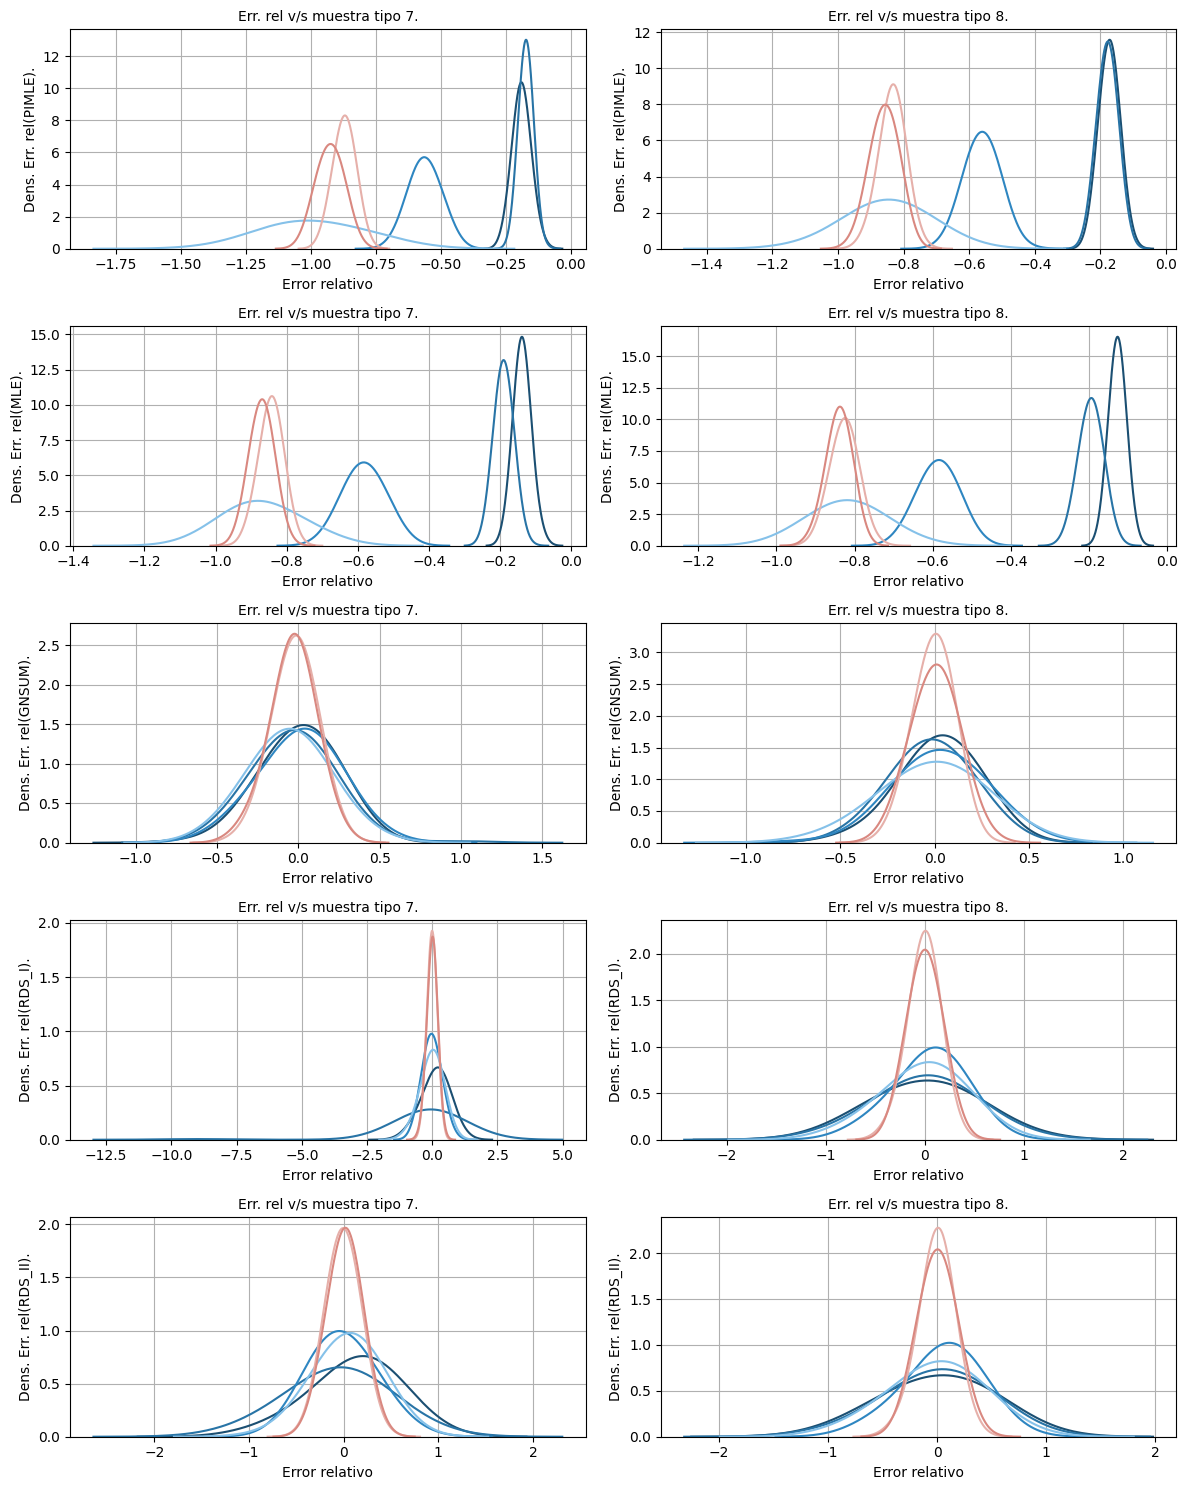

In [26]:
Tipo_sample_p_gral=list(df["Tipo_sample_p_gral"].unique())
Tipo_sample_p_gral=Tipo_sample_p_gral[2:4]

cond1=df["Porc_nodos_muestra"]==0.01
cond2=df["Metodo_infeccion"]=="DP"
cond3=df["Tipo_grafo"]=="escala"
cond4=df["Porc_infectados"]==0.1
df_contexto=df[cond1 & cond2& cond3& cond4]

l_ylim=[[0,20],[0,20],[0,42],[0,14],[0,15]]
L_met_est=list(df_experimentacion["Num_metodo_est"].unique())
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}

act_legend=False

graficar_sample_vs_ER(df_contexto,Tipo_sample_p_gral,dict_met_to_ylim,act_legend)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


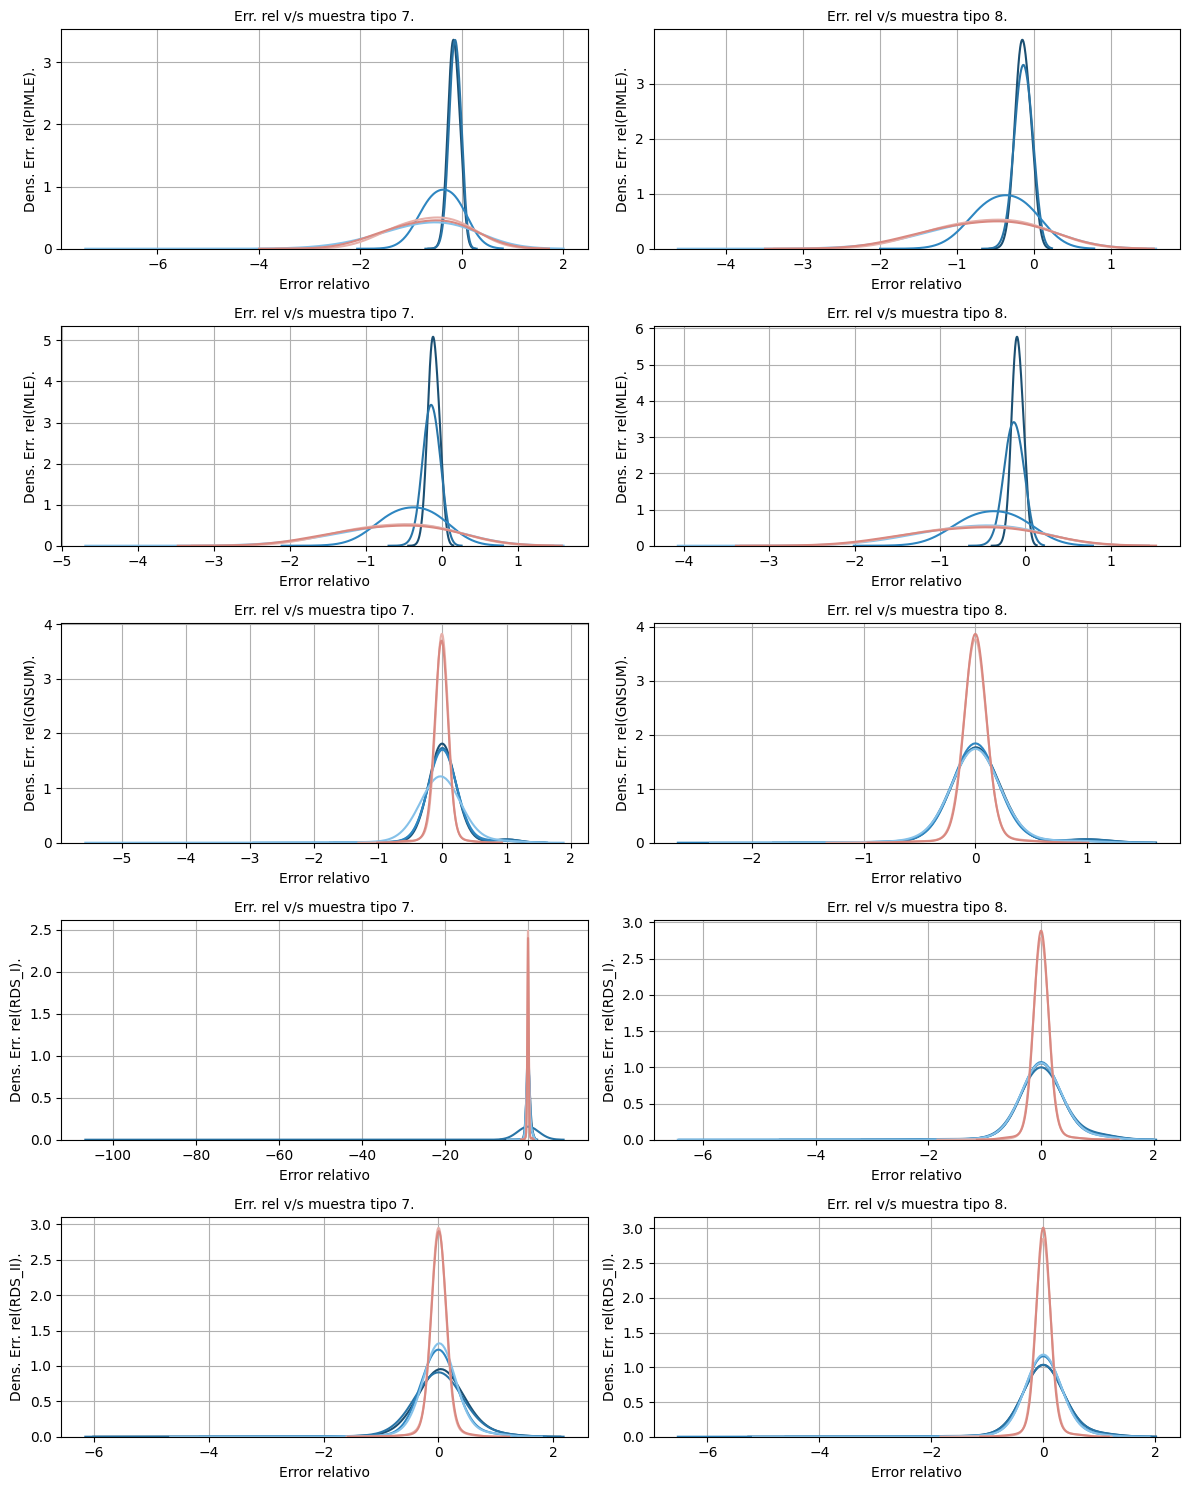

In [27]:
Tipo_sample_p_gral=list(df["Tipo_sample_p_gral"].unique())
Tipo_sample_p_gral=Tipo_sample_p_gral[2:4]


cond2=df["Metodo_infeccion"]=="DP"
cond3=df["Tipo_grafo"]=="escala"
df_contexto=df[cond2 & cond3]

l_ylim=[[0,20],[0,20],[0,42],[0,14],[0,15]]
L_met_est=list(df_experimentacion["Num_metodo_est"].unique())
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}

act_legend=False

graficar_sample_vs_ER(df_contexto,Tipo_sample_p_gral,dict_met_to_ylim,act_legend)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


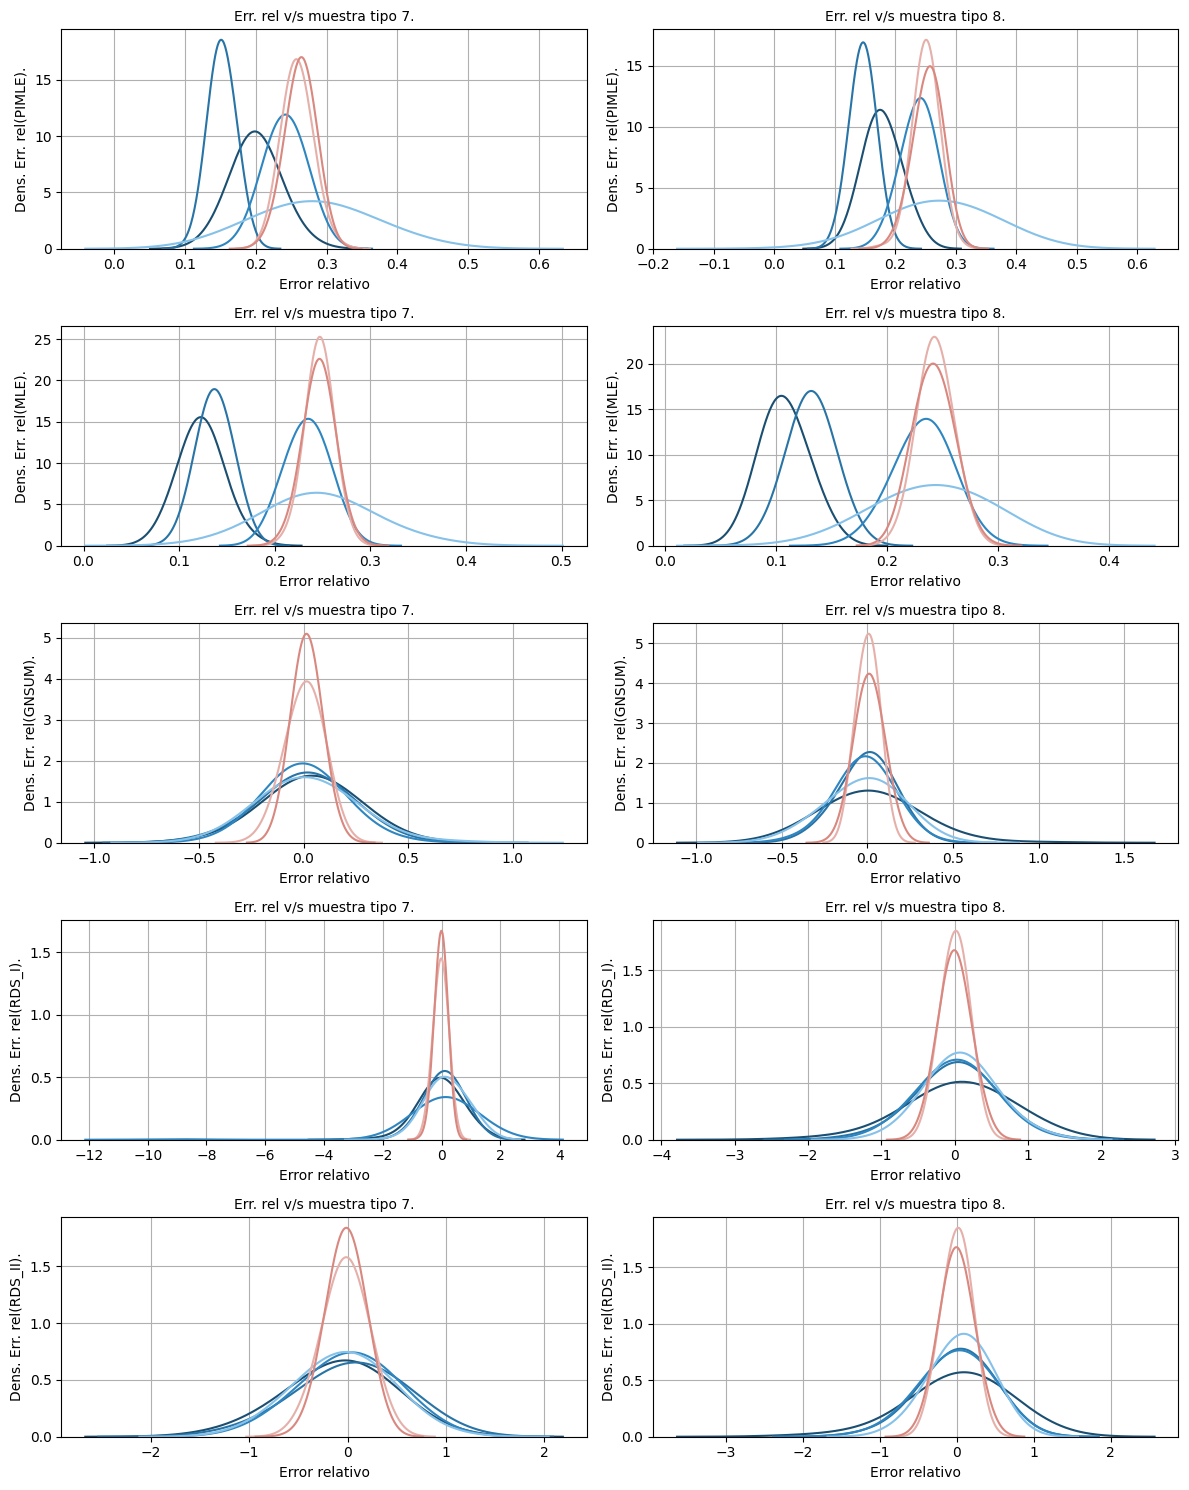

In [28]:
Tipo_sample_p_gral=list(df["Tipo_sample_p_gral"].unique())
Tipo_sample_p_gral=Tipo_sample_p_gral[2:4]

cond1=df["Porc_nodos_muestra"]==0.01
cond2=df["Metodo_infeccion"]=="IP"
cond3=df["Tipo_grafo"]=="escala"
cond4=df["Porc_infectados"]==0.1
df_contexto=df[cond1 & cond2& cond3& cond4]

l_ylim=[[0,20],[0,20],[0,42],[0,14],[0,15]]
L_met_est=list(df_experimentacion["Num_metodo_est"].unique())
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}

act_legend=False

graficar_sample_vs_ER(df_contexto,Tipo_sample_p_gral,dict_met_to_ylim,act_legend)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3


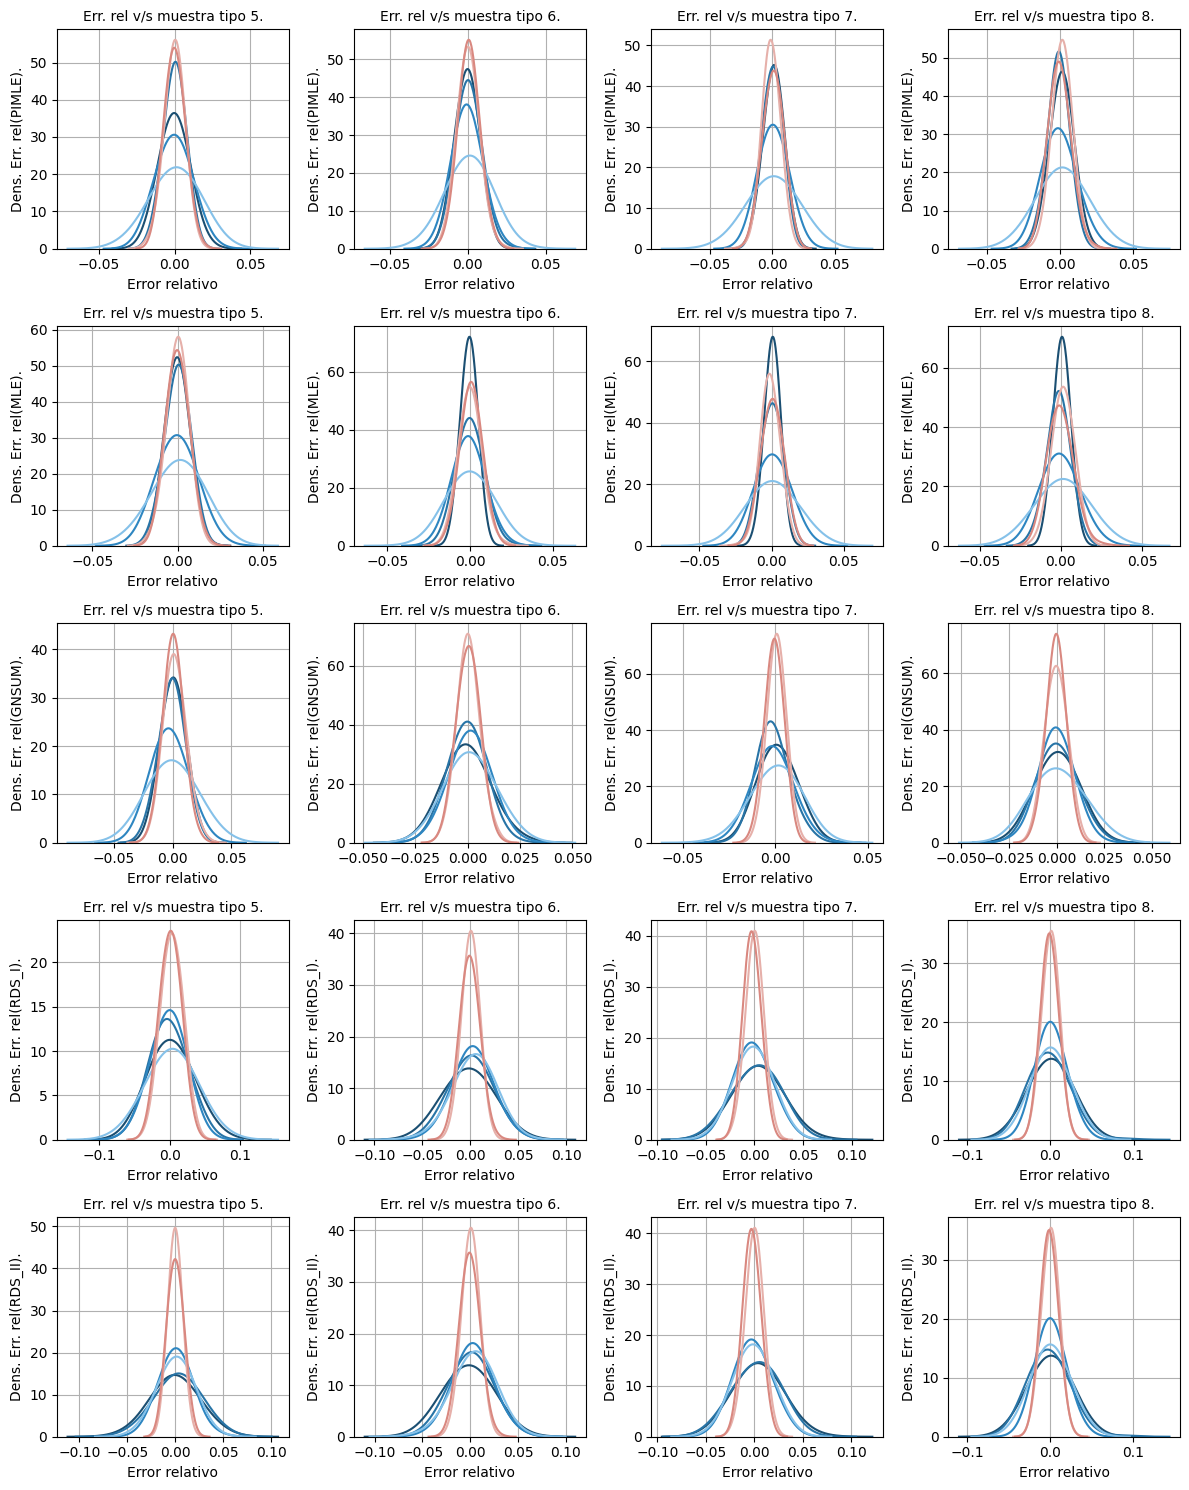

In [32]:
Tipo_sample_p_gral=list(df["Tipo_sample_p_gral"].unique())
#Tipo_sample_p_gral=Tipo_sample_p_gral[2:4]

cond1=df["Porc_nodos_muestra"]==0.5
cond2=df["Metodo_infeccion"]=="1"
cond3=df["Tipo_grafo"]=="escala"
cond4=df["Porc_infectados"]==0.5
df_contexto=df[cond1 & cond2& cond3& cond4]

l_ylim=[[0,20],[0,20],[0,42],[0,14],[0,15]]
L_met_est=list(df_experimentacion["Num_metodo_est"].unique())
dict_met_to_ylim={u:v for u,v in zip(L_met_est,l_ylim)}

act_legend=False

graficar_sample_vs_ER(df_contexto,Tipo_sample_p_gral,dict_met_to_ylim,act_legend)